<a href="https://colab.research.google.com/github/Yadukrishnan1/Computer-Vision/blob/main/Fashion_MNIST_convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [2]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras

# Python support libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A dataset with a total of 70,000 clothing artifacts. 60,000 are for training purpose and 10,000 for testing purpose of our model.
fashion = keras.datasets.fashion_mnist
# Splitting the data for training and testing.
(x_train, y_train), (x_test, y_test) = fashion.load_data() 
# Names of the artifacts
fashion_label= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


T-shirt/top


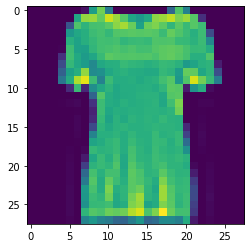

In [3]:
# Print to see each item and corresponding labels
plt.imshow(x_train[10])
print(fashion_label[y_train[10]])

In [4]:
# Data exploration
print('x_train shape = ', x_train.shape)
print('y_train shape = ', y_train.shape, '\n')

print('x_test shape = ', x_test.shape)
print('y_test shape = ', y_test.shape)

x_train shape =  (60000, 28, 28)
y_train shape =  (60000,) 

x_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


In [5]:
# Normalization of the data
x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
# Using callbacks to stop the training
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy, therefore stopped training.")
      self.model.stop_training = True
callbacks = myCallback()

In [7]:
# Setting up the neural network from Keras package in TF
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Compiling the model (Neural network)

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6300 - accuracy: 0.7796
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3878 - accuracy: 0.8596
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3462 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3091 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2645 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2540 - accuracy: 0.9049

Reached 90% accuracy, therefore stopped training.


In [8]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 0s - loss: 0.3300 - accuracy: 0.8807

Test accuracy: 0.8806999921798706

Test loss: 0.3299961984157562


In [4]:
# Using convolutional neural networks to improve the accuracy of the model.

fashion = keras.datasets.fashion_mnist
(x_train_conv, y_train), (x_test_conv, y_test) = fashion.load_data() 

x_train_conv=x_train_conv.reshape(60000, 28, 28, 1)
x_test_conv=x_test_conv.reshape(10000, 28, 28, 1)

x_train_conv=x_train_conv/255.
x_test_conv=x_test_conv/255.

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
mymodel=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                   ]
                                  )

mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mymodel.summary()

mymodel.fit(x_train_conv, y_train, epochs=5)

test_loss, test_acc=mymodel.evaluate(x_test_conv, y_test)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               346240    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 36s 2ms/step - loss: 0.5476 - accuracy: 0.8135
Epoch 2/5
1875

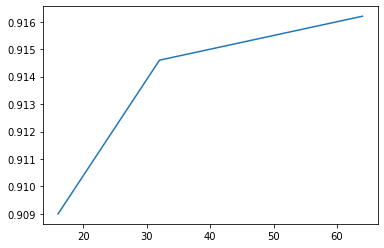

In [5]:
# Check the effect of convolution layers on accuracy

conv_layers=[16,32,64]
conv_accuracy=[]
for i in conv_layers:
  mymodel=tf.keras.models.Sequential([tf.keras.layers.Conv2D(i, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
 
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                   ]
                                  )

  mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  mymodel.summary()

  mymodel.fit(x_train_conv, y_train, epochs=5)

  test_loss, test_acc=mymodel.evaluate(x_test_conv, y_test)

  print('\nTest accuracy:', test_acc)
  print('\nTest loss:', test_loss)
  conv_accuracy.append(test_acc)

plt.plot(conv_layers, conv_accuracy)
plt.show()